<div style="text-align: center; padding: 20px;">
    <span style="font-size: 24px; font-weight: bold; text-decoration: underline;">
        BigData Framework: Final Project 
    </span>
</div>

<div style="text-align: center; font-size: 18px; line-height: 1.5;">
    SHAHIN Sarah , REDOUANE Hafsa<br>
    ING4, Data&IA, Grp3<br>
    [NOTEBOOK  1/2]
</div>
</div>
</div>
</div>
</div>


---
<h2 style="text-align: left; color: #1a1a1a;">Project Overview</h2>

<p style="text-align: left; color: #555; font-size: 16px;">
    In this project, we will analyze a set of <span style="color: #007bff; font-weight: bold;">"Nasdaq tech stocks"</span> using the <span style="color: #ff7f50; font-weight: bold;">Spark framework</span>. The objective of this project is to design an application for traders to help them make better investment decisions.
</p>

<p style="text-align: left; color: #555; font-size: 16px;">
    We will structure the project in four steps:
</p>

<ol style="text-align: left; color: #1a1a1a; font-size: 16px; list-style-type: none; padding: 0;">
    <li style="color: #007bff;">1. Project Initialization</li>
    <li style="color: #ff7f50;">2. Exploration</li>
    <li style="color: #28a745;">3. Pre-processing</li>
    <li style="color: #ffcc00;">4. Analysis and Visualization</li>
    <li style="color: #ff0000;">5. Conclusion </li>
</ol>

---

## 1. Project Initialization


<p style="text-align: left; color: #555; font-size: 16px;">
    This section will primarily focus on importing the necessary libraries, downloading and processing the data, as well as creating a Spark DataFrame.
</p>

---


### 1.1. Downloading and importing essential libraries
 <p style="text-align: left; color: #555; font-size: 16px;">
    We download the <strong>yfinance</strong> library to easily access historical and real-time financial data.
</p>


In [1]:
!pip install yfinance

  Using cached yfinance-0.2.51-py2.py3-none-any.whl (104 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached lxml-5.3.0-cp311-cp311-manylinux_2_28_x86_64.whl (5.0 MB)
  Using cached frozendict-2.4.6-py311-none-any.whl (16 kB)
  Using cached peewee-3.17.8-cp311-cp311-linux_x86_64.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)


In [2]:
# Importing necessary libraries for the project
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date, col, month, year, avg, weekofyear
from pyspark.sql import functions as F
import pandas as pd 
import matplotlib.pyplot as plt
from pyspark.sql.window import Window
import yfinance as yf
import os
from ipywidgets import interact, IntSlider, Dropdown

### 1.2. Downloading data

<p style="text-align: left; color: #555; font-size: 16px;">
    We download the data needed for our analysis using Yahoo Finance's Python API. 
</p>
<p style="text-align: left; color: #555; font-size: 16px;">
    For our analysis, we selected the following companies: Apple, Nvidia, Microsoft, Amazon, and Google.  
These companies are known for dominating their respective sectors (Electronics: AAPL, NVDA; Software and Cloud Services: MSFT, GOOG; E-commerce and Cloud Services: AMZN), in addition to having very high market capitalizations and being highly attractive. Indeed, they are considered pillars of the stock market. Furthermore, the innovative nature of these companies, driven by their investments in research and development, makes them appealing opportunities for investors, offering sustainable growth potential and high long-term returns.
</p>

<p style="text-align: left; color: #555; font-size: 16px;">
    The stocks we will analyze can be categorized based on the company's industry sector.
</p>

<table border="1">
    <thead>
        <tr>
            <th>Sector</th>
            <th>Stocks</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Electronics</td>
            <td>AAPL, NVDA</td>
        </tr>
        <tr>
            <td>Software and Cloud Services</td>
            <td>MSFT, GOOG</td>
        </tr>
        <tr>
            <td>E-commerce and Cloud Services</td>
            <td>AMZN</td>
        </tr>
    </tbody>
</table>


In [3]:
# List of stock symbols to download for analysis
stocks = ["AAPL", "NVDA", "MSFT", "AMZN", "GOOG"] 

In [4]:
os.makedirs("Data", exist_ok = True)

# Loop through each stock symbol and download the data
for i in stocks: 
    nasdaq100 = yf.download(i, start = "2010-01-01", end= "2024-11-30", multi_level_index = False)
    nasdaq100.to_csv("./Data/"+i+".csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### 1.3. Spark
<p style="text-align: left; color: #555; font-size: 16px;">
    In this section, we'll load our data into dataframes, before converting them into spark dataframes to take advantage of Spark's distributed processing.
</p>


In [5]:
# Application name
spark_application_name = "big_data_project"
# Create a Spark session with the specified application name
spark = (SparkSession.builder.appName(spark_application_name).getOrCreate())

<p style="text-align: left; color: #555; font-size: 16px;">
    We load the cleaned data into dataframes so that they can be manipulated.
</p>

In [7]:
# the path of our cleaned data
path = ["./Data/"+ i +".csv" for i in stocks]
# Loading CSV files into separate DataFrames
df_AAPL = pd.read_csv(path[0])
df_NVDA = pd.read_csv(path[1])
df_MSFT = pd.read_csv(path[2])
df_AMZN = pd.read_csv(path[3])
df_GOOG = pd.read_csv(path[4])

<p style="text-align: left; color: #555; font-size: 16px;">
    We check for missing values in our dataframes and convert the <code>Datetime</code> columns to datetime format for easier temporal analysis.
</p>

In [8]:
# We check if there are any missing values.
display(df_AAPL.info())
display(df_NVDA.info())
display(df_MSFT.info())
display(df_AMZN.info())
display(df_GOOG.info())

# Converting column "Datetime" to datetime type.
df_AAPL["Date"] = pd.to_datetime(df_AAPL["Date"]).dt.date
df_NVDA["Date"] = pd.to_datetime(df_NVDA["Date"]).dt.date
df_MSFT["Date"] = pd.to_datetime(df_MSFT["Date"]).dt.date
df_AMZN["Date"] = pd.to_datetime(df_AMZN["Date"]).dt.date
df_GOOG["Date"] = pd.to_datetime(df_GOOG["Date"]).dt.date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3753 entries, 0 to 3752
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3753 non-null   object 
 1   Close   3753 non-null   float64
 2   High    3753 non-null   float64
 3   Low     3753 non-null   float64
 4   Open    3753 non-null   float64
 5   Volume  3753 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 176.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3753 entries, 0 to 3752
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3753 non-null   object 
 1   Close   3753 non-null   float64
 2   High    3753 non-null   float64
 3   Low     3753 non-null   float64
 4   Open    3753 non-null   float64
 5   Volume  3753 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 176.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3753 entries, 0 to 3752
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3753 non-null   object 
 1   Close   3753 non-null   float64
 2   High    3753 non-null   float64
 3   Low     3753 non-null   float64
 4   Open    3753 non-null   float64
 5   Volume  3753 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 176.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3753 entries, 0 to 3752
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3753 non-null   object 
 1   Close   3753 non-null   float64
 2   High    3753 non-null   float64
 3   Low     3753 non-null   float64
 4   Open    3753 non-null   float64
 5   Volume  3753 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 176.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3753 entries, 0 to 3752
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3753 non-null   object 
 1   Close   3753 non-null   float64
 2   High    3753 non-null   float64
 3   Low     3753 non-null   float64
 4   Open    3753 non-null   float64
 5   Volume  3753 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 176.1+ KB


None

<p style="text-align: left; color: #555; font-size: 16px;">
    In the next cell, we will convert our DataFrames into Spark DataFrames.
</p>

In [9]:
# Convert Pandas DataFrame to a Spark DataFrame
df_AAPL_spark = spark.createDataFrame(df_AAPL)  
df_NVDA_spark = spark.createDataFrame(df_NVDA)  
df_MSFT_spark = spark.createDataFrame(df_MSFT)
df_AMZN_spark = spark.createDataFrame(df_AMZN)
df_GOOG_spark = spark.createDataFrame(df_GOOG)

# We are storing our Spark DataFrames in a dictionary to simplify manipulation
data_spark = {"AAPL":df_AAPL_spark, "NVDA": df_NVDA_spark, "MSFT": df_MSFT_spark, "AMZN": df_AMZN_spark, "GOOG": df_GOOG_spark}

<p style="text-align: left; color: #555; font-size: 16px;">
    We use the <strong><code>printSchema()</code></strong> function to get an overview of the variables and their types. We will apply this function to one of our Spark DataFrames since they all have the same structure.
</p>



In [10]:
# Print the schema of the Spark DataFrame to display column names and types
data_spark["AAPL"].printSchema()

root
 |-- Date: date (nullable = true)
 |-- Close: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Volume: long (nullable = true)



## 2. Exploration


<p style="text-align: left; color: #555; font-size: 16px;">
    In this section, we're going to implement functions that will allow us to manipulate the data (observe/extract). Additionally, we will answer some questions to gain a good understanding of the data.
</p>

---

### 2.1. Useful functions
<p style="text-align: left; color: #555; font-size: 16px;">
    In this part we will create and extract useful information about our stocks
</p>

#### `show_first_last_40_rows()`

We want to display the first and last 40 rows of each stock price. 
The function **`show_first_last_40_rows()`** implemented below will take a Spark DataFrame as an argument and display the first and last 40 rows of it. 

To do this, we use the **`show()`** function, passing the number of rows we want to display as a parameter. To display the last 40 rows, we use the **`tail()`** function, also passing the number of rows we want to display. 

However, for formatting purposes, we create a new Spark DataFrame from these rows while preserving the same columns (schema = `df.schema`).


In [22]:
def show_first_last_40_rows(df):
    """
    Display the first and last 40 rows of each stock price.

    Parameters:
    df : A Spark DataFrame

    """
    # Display the first 40 rows of the DataFrame
    print("> First 40 rows:")
    df.show(40)
    
    # Display the last 40 rows of the DataFrame
    print("> Last 40 rows:")
    spark.createDataFrame(df.tail(40), schema=df.schema).show(40)

#### `number_observations()`

We want to get the number of observations in the Spark DataFrame. The function **`number_observations()`** implemented below takes a Spark DataFrame as an argument and displays the number of observations, which corresponds to the number of its rows. 

To do this, we use the function **`count()`** to get the number of rows in the Spark DataFrame.



In [23]:
def number_observations(df):
    """
    Returns the number of lines in df 
    
    Parameters:
    df : A Spark DataFrame
    """
    # Count the number of lines in df
    return df.count()
print("There are %d observations." %number_observations(data_spark["AAPL"]))

There are 3753 observations.


#### `period_data_points()` 

We aim to obtain the time difference between two records in the Spark DataFrame. The function **`period_data_points()`** implemented below takes a Spark DataFrame as an argument and returns a dictionary that contains the frequency of each time period.

To achieve this, we first select the "Date" column using the **`select()`** function, and then sort it in ascending order with the **`orderBy()`** function, which is essential for accurately calculating the time differences.

Since the amount of data is too large to iterate directly over the DataFrame, we convert the Spark DataFrame into a **RDD** (Resilient Distributed Dataset). At this stage, each row of the RDD contains elements of type **Row**. We then use the **`flatMap()`** function, which applies the operation **`lambda x: x`** to extract the date value from each row of the RDD, combining all elements into a single RDD of dates. Finally, we use the **`collect()`** function to bring everything back as a list.

After completing the previous steps, we have a list of dates on which we will iterate. We will subtract the elements two by two and record the frequency of each period in a dictionary that we will return.


In [73]:
def period_data_points(df):
    """
    Returns a dictionary containing frequency of each period
    
    Parameters:
    df : A Spark DataFrame
    """
    # Collect and sort all dates from the dataframe's "Date" column
    dates = df.select("Date").orderBy("Date").rdd.flatMap(lambda x: x).collect()
    
    # Initialize a dictionary to count occurrences of each period between data points
    dic = {}

    # Iterate through dates to calculate day differences between consecutive dates
    for i in range(len(dates) - 1):
        dif = (dates[i + 1] - dates[i]).days  

        # We increment the count of this difference in the dictionary if it already exists. Otherwise, the difference is added to the dictionary.
        if dif in dic:
            dic[int(dif)] += 1
        else:
            dic[int(dif)] = 1
        
    # Return the dictionary containing frequency of each period
    return dic    

<p style="text-align: left; color: #555; font-size: 16px;">
    We observe that for our 5 stocks, the frequencies are consistent across the data. <br>
    The most common time interval in our dataset is 1 day, followed by intervals of 3 and 4 days. Additionally, there is a single instance of a 1-week interval for each stock.
</p>


In [74]:
# Display the result of period analysis
for i in data_spark:
    print(i)
    print(period_data_points(data_spark[i]))

AAPL
{1: 2941, 3: 675, 4: 101, 2: 34, 5: 1}
NVDA
{1: 2941, 3: 675, 4: 101, 2: 34, 5: 1}
MSFT
{1: 2941, 3: 675, 4: 101, 2: 34, 5: 1}
AMZN
{1: 2941, 3: 675, 4: 101, 2: 34, 5: 1}
GOOG
{1: 2941, 3: 675, 4: 101, 2: 34, 5: 1}


#### `descriptive_stat() `

We want to display descriptive statistics such as "mean, max, min, and standard deviation." The function **`descriptive_stat()`**  implemented below takes a Spark DataFrame as an argument and displays the descriptive statistics for each column. 

To achieve this, we use the **`describe()`**  function, which returns a new DataFrame that we then display using the **`show()`** function.


In [17]:
def descriptive_stat(df):
    """
    Display descriptive statistics (mean, min, max, standard deviation) for each column of the Spark DataFrame.
    
    Parameters:
    df : A Spark DataFrame
    """
    # Call the describe function on the Spark DataFrame to get summary statistics
    df.describe().show()

In [76]:
# We call our function to extract key statistics from our Spark DataFrame
for i in data_spark:
    print(i)
    descriptive_stat(data_spark[i])

AAPL
+-------+-----------------+------------------+------------------+------------------+--------------------+
|summary|            Close|              High|               Low|              Open|              Volume|
+-------+-----------------+------------------+------------------+------------------+--------------------+
|  count|             3753|              3753|              3753|              3753|                3753|
|   mean|66.57907198868591|   67.229665907397| 65.86347891410776|  66.5280626757868|2.3094598268052226E8|
| stddev|64.43050702799839| 65.04287896924818| 63.74107519144612|  64.3642988187531|2.1824140960776895E8|
|    min|5.785830497741699|5.9048290740919605| 5.731602983925352| 5.795469579269456|            24048300|
|    max|237.3300018310547|237.80999755859372|234.19234018879644|235.94700263838573|          1880998000|
+-------+-----------------+------------------+------------------+------------------+--------------------+

NVDA
+-------+------------------+-------

#### `missing_values()`

We want to count the number of `null` values per column in the Spark DataFrame. The function **`missing_values()`** implemented below takes a Spark DataFrame as a parameter and displays a new DataFrame with the number of missing values per column. 

To achieve this, we will first import the `functions` module from PySpark in order to use certain functions for DataFrame manipulation. Our function will iterate over each column of our DataFrame in order to apply an expression that will later allow us to count the number of missing values for each one. 

This expression is composed of several functions from the `functions` module:
- **`col()`**: This function takes the name of the column `c` as an argument and returns a reference to the column that we will use for the following operations.
- **`isNull()`**: This function allows us to check whether the values in column `c` are null.
- **`when()`**: This function takes a condition to verify as an argument, as well as a value to return when the condition is met. In our function, it returns a new DataFrame that contains the value 1 (chosen arbitrarily) every time the condition is satisfied.
- **`count()`**: This function counts the number of elements in the DataFrame returned by `when()`.
- **`alias()`**: This function takes a **string** as an argument and allows us to keep the column names in the new DataFrame.

This function creates a counting expression for each column in the DataFrame and stores them in a list called `null`. To execute the different expressions, we use the `select()` function, which takes our list of expressions as an argument. The returned DataFrame will be displayed using the `show()` function.


In [10]:
def missing_values(df):
    """
    Display the number of missing values for each column in the Spark DataFrame
    
    Parameters:
    df : A Spark DataFrame
    """
    # Create a list to store expressions that count the null values for each column
    null = []
    
    # Iterate over each column in the DataFrame
    for c in df.columns:
        # For each column, add a count expression to the list
        # This expression uses 'when' to select null values in the column, then counts them
        null.append(F.count(F.when(F.col(c).isNull(), 1)).alias(c))
    
    # Apply the count expressions on the DataFrame and display the result
    # The resulting DataFrame will show the number of null values for each column
    df.select(null).show()

In [78]:
# We check if there are missing values ​​in our columns
for i in data_spark:
    print(i)
    missing_values(data_spark[i])

AAPL
+----+-----+----+---+----+------+
|Date|Close|High|Low|Open|Volume|
+----+-----+----+---+----+------+
|   0|    0|   0|  0|   0|     0|
+----+-----+----+---+----+------+

NVDA
+----+-----+----+---+----+------+
|Date|Close|High|Low|Open|Volume|
+----+-----+----+---+----+------+
|   0|    0|   0|  0|   0|     0|
+----+-----+----+---+----+------+

MSFT
+----+-----+----+---+----+------+
|Date|Close|High|Low|Open|Volume|
+----+-----+----+---+----+------+
|   0|    0|   0|  0|   0|     0|
+----+-----+----+---+----+------+

AMZN
+----+-----+----+---+----+------+
|Date|Close|High|Low|Open|Volume|
+----+-----+----+---+----+------+
|   0|    0|   0|  0|   0|     0|
+----+-----+----+---+----+------+

GOOG
+----+-----+----+---+----+------+
|Date|Close|High|Low|Open|Volume|
+----+-----+----+---+----+------+
|   0|    0|   0|  0|   0|     0|
+----+-----+----+---+----+------+



#### `correlation()`

We aim to measure the linear relationship between pairs of columns in a Spark DataFrame. The function **`correlation()`** implemented below takes a Spark DataFrame as an argument and returns the **Pearson correlation coefficient** for each pair of columns.

To achieve this, we use the **`stat.corr()`** function from PySpark, which computes the Pearson correlation coefficient between two columns. This coefficient is a numeric value between -1 and 1, indicating the strength and direction of the linear relationship between the variables:
- **1**: The variables are perfectly positively correlated.
- **0**: There is no linear correlation between the variables.
- **-1**: The variables are perfectly inversely correlated.

The function iterates over pairs of columns in the DataFrame and computes the correlation for each pair, displaying the results for each combination.

Since we are dealing with multiple columns, the function processes each pair sequentially and applies **`stat.corr()`** to calculate the correlation for each pair. The results are then printed out for review.
or review.

In [35]:
def correlation(df):
    """
    Display Pearson correlation coefficient for selected column pairs

    Parameters:
    df : A Spark DataFrame
    """
    # Display Pearson correlation coefficient for selected column pairs
    print("Correlation between \"High\" and \"Low\":", df.stat.corr("High", "Low"))
    print("Correlation between \"Open\" and \"Close\":", df.stat.corr("Open", "Close"))
    print("Correlation between \"Volume\" and \"Close\":", df.stat.corr("Volume", "Close"))
    print("Correlation between \"High\" and \"Volume\":", df.stat.corr("High", "Volume"))
    print("Correlation between \"Low\" and \"Volume\":", df.stat.corr("Low", "Volume"))
    print("Correlation between \"Open\" and \"High\":", df.stat.corr("Open", "High"))

 We observe that for each stock, the columns "High" and "Low", "Open" and "Close", and "Open" and "High" are highly correlated. Other relationships are weakly inversely correlated.



In [36]:
# Display the Pearson correlation coefficient for selected column pairs for each stock
for i in stocks:
    print("\n%s:\n" %i)
    correlation(data_spark[i])


AAPL:

Correlation between "High" and "Low": 0.999879314157794
Correlation between "Open" and "Close": 0.9998034069403012
Correlation between "Volume" and "Close": -0.5426710931421932
Correlation between "High" and "Volume": -0.5417673097839374
Correlation between "Low" and "Volume": -0.5434698814333213
Correlation between "Open" and "High": 0.9999096809085988

NVDA:

Correlation between "High" and "Low": 0.9997804556903458
Correlation between "Open" and "Close": 0.9995732237317384
Correlation between "Volume" and "Close": -0.12175382171842715
Correlation between "High" and "Volume": -0.11996743283017927
Correlation between "Low" and "Volume": -0.12318268832860232
Correlation between "Open" and "High": 0.9998572178877109

MSFT:

Correlation between "High" and "Low": 0.999900564063271
Correlation between "Open" and "Close": 0.9998261462242797
Correlation between "Volume" and "Close": -0.3752039158278674
Correlation between "High" and "Volume": -0.37282972481424054
Correlation between "

### 2.2. Further Data Exploration

#### 2.2.1. Added New Columns for Filtering
---
 <p style="text-align: left; color: #555; font-size: 16px;">
    In this part, we will add the columns "Week", "Month" and "Year" so that we can filter our dataframes based on them.
</p>


#### `add_col_month_year()`

We create the "Month" and "Year" columns for each row of our Spark DataFrame in order to filter the data based on these criteria. The function **`add_col_month_year()`** extracts the month and year from the "Date" column into new columns.

To achieve this, we use the PySpark **`withColumn()`** function to add the new columns. These columns are created using the **`month()`** and **`year()`** functions to extract the month and year from the "Date" column.


In [16]:
def add_col_month_year(df):
    """
    Add "Month" and "Year" columns to a Spark DataFrame based on the "Date" column

    Parameters:
    df : A Spark DataFrame containing a "Date" column

    Returns:
    df : The updated Spark DataFrame
    """
    # Extract the month from the "Date" column and create a new column "Month"
    df = df.withColumn("Month", month(df["Date"]))
    
    # Extract the year from the "Date" column and create a new column "Year"
    df = df.withColumn("Year", year(df["Date"]))
    
    # Return the updated DataFrame
    return df

In [17]:
# Iterate over each stock
for i in stocks:
    # Apply the "add_col_month_year" function to the DataFrame corresponding to the stock
    data_spark[i] = add_col_month_year(data_spark[i])

#### `add_week_col()`

We create a "Week" column in our Spark DataFrame to organize and analyze data by weeks. The function **`add_week_col()`** extracts the week number from the "Date" column and adds it as a new column.

To achieve this, we use the PySpark **`withColumn()`** function to add the "Week" column. The week number is extracted using the **`weekofyear()`** function, which computes the week of the year for each date.


In [18]:
def add_week_col(df):
    """
    Add a "Week" column to a Spark DataFrame

    Parameters:
    df : A Spark DataFrame

    Returns:
    df_week : The updated Spark DataFrame with the new "Week" column
    """
    # Extract the week of the year from the "Date" column and create a new column
    df_week = df.withColumn("Week", weekofyear(df["Date"]))
    
    return df_week

In [19]:
# We add a "Week" column to our actions 
for i in stocks:
    data_spark[i] = add_week_col(data_spark[i])

#### 2.2.2. Technical and Business Questions
---

 <p style="text-align: left; color: #555; font-size: 16px;">
    In this part, we will answer technical and business questions to gain a good understanding of the data.
</p>


#### What is the average of the opening and closing prices for each stock price and for different time periods (month, year)?

#### `average_open_close_price()`

We compute the average closing price for each year and each month in the Spark DataFrame. The function **`average_open_close_price`** calculates two distinct DataFrames: one with yearly averages and the other with monthly averages.

To achieve this, we use the **`groupBy()`** function:
- For yearly averages, we group the data by the "Year" column.
- For monthly averages, we group the data by both the "Year" and "Month" columns.

After grouping, we calculate the average of the "Close" column using the **`avg()`** function. Then, we rename the resulting averages to "Avg_Close" using the **`alias()`** function.

The function returns two DataFrames as output. The first, **`df_year`**, contains the average closing prices calculated for each year. The second, **`df_month`**, provides the average closing prices for each month within each year. These outputs allow for a comprehensive analysis of closing price trends over time. 


In [13]:
def average_open_close_price(df):
    """
    Calculate the average closing and opening prices per year and per month for a given Spark DataFrame


    Returns:
    df_year : A Spark DataFrame with the average closing and opening prices per year
    df_month : A Spark DataFrame with the average closing and opening prices per month and year
    """
    # Group the data by year and calculate the average of the "Close" and "Open" columns
    df_year = (df.orderBy("Year").groupBy("Year").agg(avg("Close").alias("Avg_Close"), avg("Open").alias("Avg_Open")))
    
    # Group the data by year and month, then calculate the average of the "Close" and "Open" columns
    df_month = (df.orderBy("Year").groupBy("Year", "Month").agg(avg("Close").alias("Avg_Close"), avg("Open").alias("Avg_Open")))
    
    return df_year, df_month


In [14]:
# Iterate over each stock in the list
for i in stocks:
    # Calculate yearly and monthly average closing prices for the current stock
    year, month = average_open_close_price(data_spark[i]) 
    
    # stock name
    print(i)
    year.show()
    # We display the first and last 40 lines of the spark dataframe "month"
    show_first_last_40_rows(month)


AAPL
+----+------------------+------------------+
|Year|         Avg_Close|          Avg_Open|
+----+------------------+------------------+
|2010| 7.828191910471235| 7.831661233671192|
|2011|10.966243952039688|10.967964266929078|
|2012|17.396579025268554|17.414853767618805|
|2013|14.560661804108392| 14.57575445999872|
|2014| 20.37810750991579|20.368198357097967|
|2015|26.966094630105154|26.996546808121316|
|2016| 23.98571823513697| 23.96354681889932|
|2017| 35.17249008573859| 35.14787691619906|
|2018| 44.84062805783701| 44.85461912790489|
|2019| 50.17472621372768|50.081506652919785|
|2020| 92.93905274764352| 92.86208054372875|
|2021|138.34601069253588|138.22055137841562|
|2022| 152.7753449398208|152.74354084275075|
|2023| 171.2819959716797|170.99214677066539|
|2024| 202.9016378823813|  202.715425299893|
+----+------------------+------------------+

NVDA
+----+-------------------+-------------------+
|Year|          Avg_Close|           Avg_Open|
+----+-------------------+--------------

##### Interpretation

**AAPL**:  
Growth started in 2016, following fluctuations between 2010 and 2015. The launch of new products and the expansion of services boosted growth, after periods of uncertainty related to market saturation.

**NVDA**:  
There were significant variations between 2010 and 2022, with notable growth between 2015-2016 and 2019-2021. Since 2022, the stock has surged, driven by the demand for AI, reaching a price 340 times higher than in 2010.

**MSFT**:  
Solid growth since 2011, despite a slight dip in 2022. The expansion into cloud computing and services has supported strong stock performance, even after a small slowdown in 2022.

**AMZN**:  
Rapid growth from 2010 to 2021, followed by a decline in 2022-2023 due to the COVID-19 crisis. The retail sector was affected, but the stock rebounded in 2024 with the economic recovery.

**GOOG**:  
Like AMZN, Google's stock fell in 2022-2023, mainly due to reduced advertising spending and increased competition, but it has gradually recovered in 2024.


#### How do the stock prices change day to day and month to month ?

#### `stock_price_change()`

We calculate the difference between "Open" and "Close" prices for each day and each month in the Spark DataFrame. The function **`stock_price_change()`** computes two distinct DataFrames: one with daily differences and the other with monthly average differences.

To achieve this:
- For daily differences, we use **`withColumn()`** to create a new column, `Open_Close_Diff_day`, which stores the difference between the "Open" and "Close" prices for each day. The data is then sorted by "Date".
- For monthly averages, we also create a column for the difference between "Open" and "Close". We then group the data by "Year" and "Month" using **`groupBy()`** and calculate the average difference for each month with **`avg()`**.

The function returns two DataFrames as output. The first, **`day_var`**, contains the daily differences sorted by "Date". The second, **`month_var`**, provides the monthly average differences grouped by year and month. These outputs allow for a detailed analysis of stock price changes over time.
nd month.
 et mois.


In [12]:
def stock_price_change(df):
    """
    Calculate the difference between "Open" and "Close" prices for daily and monthly data

    Parameters:
    df : A Spark DataFrame

    Returns:
    day_var : DataFrame with the daily difference between "Open" and "Close"
    month_var : DataFrame with the monthly average difference between "Open" and "Close" 
    """
    # Calculate the daily difference between "Open" and "Close" prices
    day_var = df.withColumn("Open_Close_Diff_day", df["Open"] - df["Close"]).orderBy("Date")
    
    # Calculate the monthly average difference between "Open" and "Close" prices
    month_var = df.withColumn("Open_Close_Diff", df["Open"] - df["Close"]).orderBy("Year").groupBy("Year", "Month").agg(avg("Open_Close_Diff").alias("Avg_Open_Close_Diff"))
    
    return day_var, month_var

#### What is the daily return of each stock?

#### `daily_return_rate()`

We want to calculate the daily return rate for a stock. The function **`daily_return_rate()`** takes a Spark DataFrame as an argument and calculates the daily return for each stock.

To achieve this, the function uses **`withColumn()`** to create a new column **`Daily_Return_Rate`**.

The function returns a DataFrame with the new column **`Daily_Return_Rate`**, which contains the daily return rate for each stock.


In [24]:
def daily_return_rate(df):
    """
    Calculate the daily return for the stock

    Parameters:
    df : A Spark DataFrame

    Returns:
    DataFrame with the "Daily_Return" column
    """
    # Calculate the daily return
    df_with_return = df.withColumn("Daily_Return_Rate", (df["Close"] - df["Open"]) / df["Open"])

    return df_with_return


In [25]:
# We update our spark dataframe with the new dataframe containing the column "Daily_Return_Rate"
for i in stocks:
    data_spark[i] =  daily_return_rate(data_spark[i])

#### What are the stocks with the highest/Lowest/Average daily return?

The program below calls the `descriptive_stat()` function, which was implemented earlier. 
This function calculates the minimum, maximum, and average values of the "Daily_Return_Rate" column for each stock.
We can observe that the action "NVDA" is the one with the highest and lowest daily return, in addition to having the highest average.
.


In [18]:
# Loop through each stock
for i in stocks:
    print("\n%s :\n" % i) 
    # Call the descriptive_stat function on "Daily_Return_Rate" for each stock
    descriptive_stat(data_spark[i].select("Daily_Return_Rate"))  



AAPL :

+-------+--------------------+
|summary|   Daily_Return_Rate|
+-------+--------------------+
|  count|                3753|
|   mean|4.228036014594483...|
| stddev|0.013710884429642821|
|    min|-0.07257863789222015|
|    max| 0.08696110215193661|
+-------+--------------------+


NVDA :

+-------+--------------------+
|summary|   Daily_Return_Rate|
+-------+--------------------+
|  count|                3753|
|   mean|5.504595746812443E-4|
| stddev|0.023209361860018922|
|    min|-0.13207546108852852|
|    max|  0.1491141553282914|
+-------+--------------------+


MSFT :

+-------+--------------------+
|summary|   Daily_Return_Rate|
+-------+--------------------+
|  count|                3753|
|   mean|3.874138045876769E-4|
| stddev|0.012493455608999166|
|    min|-0.05924653353756428|
|    max| 0.08102449737995214|
+-------+--------------------+


AMZN :

+-------+--------------------+
|summary|   Daily_Return_Rate|
+-------+--------------------+
|  count|                3753|


##### Interpretation:

**AAPL**:  
Good return with moderate risk, making it a balanced investment.

**MSFT**:  
Balanced between return and risk, slightly below AAPL in terms of performance.

**NVDA**:  
Higher return potential but comes with significantly higher risk.

**GOOG**:  
Low return but low risk, suitable for cautious investors.

**AMZN**:  
Average low return with higher risk.


#### What is the average daily return for each stocks for different periods (week, month and year) ? 

#### `return_rate()`

We calculate the average daily return rates across three time periods: weekly, monthly, and yearly. The function **`return_rate()`** groups the data and computes the average `Daily_Return_Rate` for each period.

To achieve this, we use the PySpark **`groupBy()`** function to group the data by specific time periods (Year, Month, Week) and calculate the average using the **`avg()`** function. Each resulting DataFrame is sorted by year for better readability and organization.
eturn rate for each year.


In [13]:
def return_rate(df):
    """
    Calculate the average daily return for weekly, monthly, and yearly periods

    Parameters:
    df : A Spark DataFrame

    Returns:
    df_avg_week : The Spark DataFrame with the weekly average daily return
    df_avg_month : The Spark DataFrame with the monthly average daily return
    df_avg_year : The Spark DataFrame with the yearly average daily return
    """
    # calculate the weekly average daily return
    df_avg_week = df.orderBy("Year").groupBy("Year", "Month", "Week").agg(avg("Daily_Return_Rate").alias("week_avg_daily_return"))
    
    # calculate the monthly average daily return
    df_avg_month = df.orderBy("Year").groupBy("Year", "Month").agg(avg("Daily_Return_Rate").alias("month_avg_daily_return"))
    
    # calculate the yearly average daily return
    df_avg_year = df.orderBy("Year").groupBy("Year").agg(avg("Daily_Return_Rate").alias("year_avg_daily_return"))
    
    return df_avg_week, df_avg_month, df_avg_year


### 2.3. More Functions
<p style="text-align: left; color: #555; font-size: 16px;">
    In this section we will code more functions to help us in our analysis.
</p>


#### `moving_average()`

We calculate the moving average of a given column over a specified number of points. The function **`moving_average()`** computes the moving average by considering the current value and the previous values within the defineintervalow.

To achieve this, we use the PySpark **`Window.orderBy()`** function to define a window based on the "Date" column. The **`rowsBetween(-num_points + 1, 0)`** specification ensures that the window includes the current row and the previous rows up to the number of periods defined. Then, the **`avg()`** function calculates the moving average within the window. The result is added as a new column in the DataFrame, containing the calculated moving average for each row.


In [ ]:
def moving_average(df, col_name, num_points):
    """
    Calculate the moving average of a given column over a specified number of points

    Parameters:
    df : A Spark DataFrame
    col_name : The name of the column
    num_points : The number of periods over which to calculate the moving average 

    Returns:
    df : The Spark DataFrame with a new column containing the moving average values
    """
    # Define a window specification to calculate the moving average for each row
    interval = Window.orderBy("Date").rowsBetween(-num_points + 1, 0)
    
    # Calculate the moving average
    df = df.withColumn(f"{col_name}_moving_average", avg(df[col_name]).over(interval))
    
    return df


#### `correlation_df_values()`
We aim to measure the linear relationship between pairs of columns in two Spark DataFrames. The `correlation()` function takes two DataFrames as arguments and returns the Pearson correlation coefficient for each pair of corresponding columns.

To achieve this:

- The columns in both DataFrames are renamed to avoid conflicts.
- The DataFrames are joined on the "Date" column.
- The `stat.corr()` function is used to calculate the correlation between each pair of corresponding columns.

The Pearson correlation coefficient is a number between -1 and 1, indicating the strength and direction of the linear relationship between the variables:

- **1**: Perfect positive correlation.
- **0**: No linear correlation.
- **-1**: Perfect negative correlation.

In [10]:
def correlation_df_values(df1, df2):
    """
    Calculate Pearson correlation coefficients between corresponding columns
    
    Parameters:
    df1 : A Spark DataFrame
    df2 : A Spark DataFrame
    
    Output: Displays the correlation between corresponding columns
    """

    # Renaming columns for df1
    df1_renamed = df1.withColumnRenamed("Open", "Open_df1")
    df1_renamed = df1_renamed.withColumnRenamed("Close", "Close_df1")
    df1_renamed = df1_renamed.withColumnRenamed("High", "High_df1")
    df1_renamed = df1_renamed.withColumnRenamed("Low", "Low_df1")
    df1_renamed = df1_renamed.withColumnRenamed("Volume", "Volume_df1")
    
    # Renaming columns for df2
    df2_renamed = df2.withColumnRenamed("Open", "Open_df2")
    df2_renamed = df2_renamed.withColumnRenamed("Close", "Close_df2")
    df2_renamed = df2_renamed.withColumnRenamed("High", "High_df2")
    df2_renamed = df2_renamed.withColumnRenamed("Low", "Low_df2")
    df2_renamed = df2_renamed.withColumnRenamed("Volume", "Volume_df2")


    # Joining the two DataFrames on the "Date" column
    df_joined = df1_renamed.join(df2_renamed, "Date", "inner")
    
    # Joining two DataFrames on the "Date" columnCalculate and display the correlation for each pair of columns
    for column in ["Open", "Close", "High", "Low", "Volume"]:
        correlation_value = df_joined.stat.corr(f"{column}_df1", f"{column}_df2")
        print(f"Correlation for the variable {column}: {correlation_value}")


#### `best_return_stock_name()`

We calculate the return rate for each stock over the specified period (monthly or yearly) and return the stock with the highest return rate.

To achieve this, the function **`best_return_stock_name()`** iterates through each stock in the `data_spark` dictionary. For each stock, it filters the data based on the start date and pear'). It then uses the **`return_rate()`** function to compute the average daily return rates over the specified period.

Once the data is filtered and the return rates calculated, the function sorts the return rates in descending order to identify the stock with the highest return rate. The function updates the `best_stock_name` and `best_return` variables accordingly and returns the name of the stock with the highest return rate along with the value of the return rate.


In [26]:
def best_return_stock_name(data_spark, start_date, period):
    """
    We calculate the return rate for each stock over the specified period and return the stock with the highest return rate

    Parameters:
    data_spark : A dictionary containing our Spark DataFrames
    start_date : The start date 
    period : The period to calculate the return rate

    Returns:
    best_stock_name : The stock with the highest return rate
    best_return : The highest return rate for the given period
    """
    # We initialize this variable with a very small float
    best_return = -1000.0  
    best_stock_name = None

    # Loop through each stock in the dictionary to calculate the return rate
    for stock, df in data_spark.items():
        # Filter the data based on the start date and the chosen period
        if period == 'month':
            df_filtered = df.filter((F.month(df["Date"]) == F.month(F.lit(start_date))) & (F.year(df["Date"]) == F.year(F.lit(start_date))))
        elif period == 'year':
            df_filtered = df.filter(F.year(df["Date"]) == F.year(F.lit(start_date)))
        else:
            raise ValueError("Error, please choose either 'month' or 'year'")
        
        # Calculate the average daily return rates for each period using the previously defined function
        weekly_return, monthly_return, yearly_return = return_rate(df_filtered)

        # Select the relevant return DataFrame based on the chosen period
        if period == "month":
            df_result = monthly_return  
        elif period == "year":
            df_result = yearly_return  
        
        # Identify the stock with the best return rate in the selected period
        best_for_stock = df_result.orderBy(F.desc(f"{period}_avg_daily_return")).first()
        
        # Update the best stock if a higher return is found
        if best_for_stock[f"{period}_avg_daily_return"] > best_return:
            best_return = best_for_stock[f"{period}_avg_daily_return"]
            best_stock_name = stock
    
    return best_stock_name, best_return

In [27]:
best_stock_name, best_return = best_return_stock_name(data_spark, "2024-01-01", "month")
print(f"The stock with the best return rate is \"{best_stock_name}\", with a return rate of {best_return}.")

The stock with the best return rate is "NVDA", with a return rate of 0.007012120205735495.


### 2.4. Insights
<p style="text-align: left; color: #555; font-size: 16px;">
    In this part, we will add additional parameters that will allow us to deepen our analysis. 
We will focus on the following 8 insights: RSI, MACD, OBV, ROC, VWAP, PPO, CMF, PVT.
These insights can be classified into 4 distinct categories depending on what they highlight.
</p>

<table border="1" style="border-collapse: collapse; width: 100%;">
  <thead>
    <tr>
      <th style="padding: 8px; text-align: left;">Part</th>
      <th style="padding: 8px; text-align: left;">What They Show</th>
      <th style="padding: 8px; text-align: left;">Indicators</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 8px;">2.4.1.</td>
      <td style="padding: 8px;">Overbought / Oversold</td>
      <td style="padding: 8px;">RSI, PPO</td>
    </tr>
    <tr>
      <td style="padding: 8px;">2.4.2.</td>
      <td style="padding: 8px;">Trend Direction / Strength</td>
      <td style="padding: 8px;">MACD, VWAP</td>
    </tr>
    <tr>
      <td style="padding: 8px;">2.4.3.</td>
      <td style="padding: 8px;">Buying / Selling Pressure</td>
      <td style="padding: 8px;">OBV, CMF, PVT</td>
    </tr>
    <tr>
      <td style="padding: 8px;">2.4.4.</td>
      <td style="padding: 8px;">Speed or Momentum</td>
      <td style="padding: 8px;">ROC</td>
    </tr>
  </tbody>
</table>


#### 2.4.1. Overbought / Oversold
---

#### RSI (Relative Strength Index)
The RSI measures the strength of a price movement on a scale of 0 to 100, where an RSI above 70 indicates overbought and below 30 indicates oversold.

#### `RSI()`

We calculate the Relative Strength Index (RSI) for each stock and add it as a new column to the Spark DataFrame. The function **`RSI()`** starts by calculating the daily price change in the "Close" column. It then separates the positive price changes as "gains" and negative changes as "losses." For each stock, the function computes the average gains and losses over the specified period using a rolling window.

Once the average gains and losses are calculated, the function computes the Relative Strength (RS) by dividing the average gain by the average loss. Then, the RSI is calculated using the formula: `RSI = 100 - (100 / (1 + RS))`.

After computing the RSI, the function drops intermediate columns and returns the DataFrame with the "RSI" column.


In [17]:
def RSI(df, period):
    """
    Add a Relative Strength Index column to a Spark DataFrame
    
    Parameters:
    df : Spark DataFrame
    
    Returns:
    df_rsi : Spark DataFrame with an additional "RSI" column
    """
    # Calculate the daily change in closing price
    df = df.withColumn("dif", F.col("Close") - F.lag("Close").over(Window.orderBy("Date")))
    
    # Separate gains and losses
    df = df.withColumn("gain", F.when(F.col("dif") > 0, F.col("dif")).otherwise(0))
    df = df.withColumn("loss", F.when(F.col("dif") < 0, -F.col("dif")).otherwise(0))
    
    # Calculate the average gains and losses
    df = df.withColumn("avg_gain", F.avg("gain").over(Window.orderBy("Date").rowsBetween(-period + 1, 0)))
    df = df.withColumn("avg_loss", F.avg("loss").over(Window.orderBy("Date").rowsBetween(-period + 1, 0)))
    
    # Calculate the relative strength
    df = df.withColumn("RS", F.col("avg_gain") / F.col("avg_loss"))
    
    # Calculate the RSI
    df = df.withColumn("RSI", 100 - (100 / (1 + F.col("RS"))))
    
    # Drop intermediate columns to keep the DataFrame clean
    df_rsi = df.drop("dif", "gain", "loss", "avg_gain", "avg_loss", "RS")
    
    return df_rsi


In [18]:
# We add the RSI column to our Dataframes
for i in stocks:
    data_spark[i] = RSI(data_spark[i], 14) # We chose a period of 14 because according to John Welles Wilder Jr., this is the recommended period for making trades.

#### PPO (Percentage Price Oscillator)

The PPO measures the relative difference between two exponential moving averages (EMAs) to identify momentum and trends in stock prices.

#### `PPO()`

We calculate the Percentage Price Oscillator (PPO) for each stock and add it as a new column to the Spark DataFrame. The function **`PPO()`** begins by calculating two EMAs: one for a short period and another for a long period. The short period is typically set to 12 and the long period to 26.

Next, the function calculates the percentage difference between the two EMAs, which is the PPO value. This helps to compare momentum across stocks regardless of their price range.

After computing the PPO, the function removes intermediate columns to keep the DataFrame clean and returns it with the new "PPO" column.

*The values of 12 and 26 are commonly used based on the recommendation by Gerald Appel, who introduced the PPO in the late 1970s. These values balance short-term responsiveness with long-term trend smoothing to capture meaningful price movement without being overly sensitive to noise.*


In [19]:
def PPO(df, short_period=12, long_period=26):
    """
    Add a PPO column to a Spark DataFrame

    Parameters:
    df : Spark DataFrame
    short_period : The short period for the EMA calculation
    long_period : The long period for the EMA calculation

    Returns:
    df_ppo : Spark DataFrame with an additional "PPO" column
    """
    # Calculate the short-term EMA
    df = df.withColumn("ema_short", F.avg("Close").over(Window.orderBy("Date").rowsBetween(-short_period + 1, 0)))
    
    # Calculate the long-term EMA
    df = df.withColumn("ema_long", F.avg("Close").over(Window.orderBy("Date").rowsBetween(-long_period + 1, 0)))
    
    # Calculate the PPO
    df = df.withColumn("PPO", ((F.col("ema_short") - F.col("ema_long")) / F.col("ema_long")) * 100)
    
    # Drop intermediate columns
    df_ppo = df.drop("ema_short", "ema_long")
    
    return df_ppo

In [20]:
# We add the PPO column to our Dataframe
for i in stocks:
    data_spark[i] = PPO(data_spark[i])

#### 2.4.2. Trend Direction / Strength
---

#### MACD (Moving Average Convergence Divergence)

The MACD is a trend-following momentum indicator that shows the relationship between two EMAs of a stock's price. It is used to identify potential buy and sell signals based on the convergence and divergence of the moving averages.

#### `MACD()`

The function **`MACD()`** calculates the MACD for each stock in the Spark DataFrame by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA. It also calculates the Signal Line as the 9-period EMA of the MACD. The MACD line is used to track momentum, while the Signal Line helps identify potential buy and sell signals.

The choice of 12, 26, and 9 periods is based on the work of Gerald Appel, who found these values provide a good balance between responsiveness to recent price movements and smoothing of longer-term trends. After calculating the MACD and Signal Line, the function returns the DataFrame with two new columns: "MACD" and "Signal".



In [21]:
def MACD(df, short_period=12, long_period=26, signal_period=9):
    """
    Add a MACD column to a Spark DataFrame
    
    Parameters:
    df : Spark DataFrame
    short_period : The short period for the MACD calculation
    long_period : The long period for the MACD calculation
    signal_period : The period for the signal line
    
    Returns:
    df_macd : Spark DataFrame with additional "MACD" and "Signal" columns
    """
    # Calculate the short-term exponential moving average
    df = df.withColumn("ema_short", F.avg("Close").over(Window.orderBy("Date").rowsBetween(-short_period + 1, 0)))
    
    # Calculate the long-term exponential moving average
    df = df.withColumn("ema_long", F.avg("Close").over(Window.orderBy("Date").rowsBetween(-long_period + 1, 0)))
    
    # Calculate the MACD line
    df = df.withColumn("MACD", F.col("ema_short") - F.col("ema_long"))
    
    # Calculate the signal line
    df = df.withColumn("Signal", F.avg("MACD").over(Window.orderBy("Date").rowsBetween(-signal_period + 1, 0)))
    
    # Drop intermediate columns to keep the DataFrame clean
    df_macd = df.drop("ema_short", "ema_long")
    
    return df_macd


In [22]:
# We add the MACD and Signal columns to our Dataframes
for i in stocks:
    data_spark[i] = MACD(data_spark[i])

#### VWAP (Volume Weighted Average Price)
The VWAP represents the average price of a stock weighted by its trading volume. It is commonly used to measure the price at which most of the trading volume occurred during a given period.

#### `VWAP()`

We calculate the Volume Weighted Average Price (VWAP) for each stock and add it as a new column to the Spark DataFrame. The function **`VWAP()`** starts by calculating the typical price, which is the average of the high, low, and close prices for each period. Then, it computes the cumulative volume and the cumulative typical price multiplied by the volume using a rolling window.

Once the cumulative volume and typical price * volume are calculated, the function computes the VWAP by dividing the cumulative typical price * volume by the cumulative volume.

After computing the VWAP, the function drops intermediate columns and returns the DataFrame with the "VWAP" column.


In [23]:
def VWAP(df):
    """
    Add a VWAP column to a Spark DataFrame
    
    Parameters:
    df : Spark DataFrame
    
    Returns:
    df_vwap : Spark DataFrame with an additional "VWAP" column
    """
    # Calculate the typical price (average of High, Low, and Close)
    df = df.withColumn("typical_price", (F.col("High") + F.col("Low") + F.col("Close")) / 3)
    
    # Calculate the cumulative volume and cumulative typical price * volume
    df = df.withColumn("cum_volume", F.sum("Volume").over(Window.orderBy("Date")))
    df = df.withColumn("cum_tp_volume", F.sum(F.col("typical_price") * F.col("Volume")).over(Window.orderBy("Date")))
    
    # Calculate the VWAP
    df = df.withColumn("VWAP", F.col("cum_tp_volume") / F.col("cum_volume"))
    
    # Drop intermediate columns to keep the DataFrame clean
    df_vwap = df.drop("typical_price", "cum_volume", "cum_tp_volume")
    
    return df_vwap

In [24]:
# We add the VWAP column to our Dataframe
for i in stocks:
    data_spark[i] = VWAP(data_spark[i])

#### 2.4.3. Buying / Selling Pressure
---

#### OBV (On-Balance Volume)

The OBV indicator is used to measure buying and selling pressure based on volume. It is calculated as a cumulative sum, where the volume is added when the price increases and subtracted when it decreases.

#### `OBV()`

We calculate the On-Balance Volume (OBV) for a stock and add it as a new column to the Spark DataFrame. The function **`OBV()`** begins by determining the price movement direction using the "Close" column. A value of 1 is assigned for an increase, -1 for a decrease, and 0 for no change. 

The OBV change for each day is calculated as the product of the direction and the trading volume. Using a rolling sum, the cumulative OBV is computed over the entire dataset.

After calculating the OBV, the function removes intermediate columns to return a clean DataFrame containing the "OBV" column.


In [25]:
def OBV(df):
    """
    Add an On-Balance Volume column to a Spark DataFrame
    
    Parameters:
    df : Spark DataFrame
    
    Returns:
    df_obv : Spark DataFrame with an additional "OBV" column
    """
    # Determine the price direction
    df = df.withColumn("direction", F.when(F.col("Close") > F.lag("Close").over(Window.orderBy("Date")), 1).when(F.col("Close") < F.lag("Close").over(Window.orderBy("Date")), -1).otherwise(0))
    
    # Calculate the daily OBV change
    df = df.withColumn("obv_change", F.col("direction") * F.col("Volume"))
    
    # Compute the cumulative OBV
    df = df.withColumn("OBV", F.sum("obv_change").over(Window.orderBy("Date")))
    
    # Drop intermediate columns to keep the DataFrame clean
    df_obv = df.drop("direction", "obv_change")
    
    return df_obv


In [26]:
# We add the OBV column to our Dataframe
for i in stocks:
    data_spark[i] = OBV(data_spark[i])

#### CMF (Chaikin Money Flow)

The CMF measures the cumulative flow of money into and out of a stock over a specified period, helping to identify the strength of a trend by analyzing price and volume.

#### `CMF()`

We calculate the Chaikin Money Flow (CMF) for each stock and add it as a new column to the Spark DataFrame. The function **`CMF()`** begins by calculating the **Money Flow Multiplier (MFM)** for each row, which is determined by the relationship between the stock's high, low, and close prices. 

Then, the function calculates the **Money Flow Volume (MFV)** by multiplying the MFM by the stock's volume for the corresponding period. The **Cumulative Money Flow (CMF)** is computed by summing up the MFV values over the specified period, and the final CMF value is the result of dividing the cumulative MFV by the cumulativectuations.

After calculating the CMF, the function removes any intermediate columns and returns the DataFrame with the new "CMF" column.


In [27]:
def CMF(df, period):
    """
    Add a Chaikin Money Flow column to a Spark DataFrame
    
    Parameters:
    df : Spark DataFrame
    period : The period to calculate the CMF
    
    Returns:
    df_cmf : Spark DataFrame with an additional "CMF" column
    """
    # Calculate the Money Flow Multiplier
    df = df.withColumn("MFM", ((F.col("Close") - F.col("Low")) - (F.col("High") - F.col("Close"))) / (F.col("High") - F.col("Low")))
    
    # Calculate the Money Flow Volume
    df = df.withColumn("MFV", F.col("MFM") * F.col("Volume"))
    
    # Calculate the CMF by summing the MFV and dividing by the sum of volume over the specified period
    windowSpec = Window.orderBy("Date").rowsBetween(-period + 1, 0)
    df = df.withColumn("CMF", F.sum("MFV").over(windowSpec) / F.sum("Volume").over(windowSpec))
    
    # Return the DataFrame with the added CMF column
    df_cmf = df.drop("MFM", "MFV")
    
    return df_cmf


In [28]:
# We add the CMF column to our Dataframe
for i in stocks:
    # We use a 20-day period, to ensure a good balance between responsiveness to market movements and smoothing out short-term fluctuations
    data_spark[i] = CMF(data_spark[i], 20)

#### PVT (Price Volume Trend)

The PVT is a volume-based momentum indicator that combines price and volume data to measure the strength of price movements and trends.

#### `PVT()`

We calculate the Price Volume Trend (PVT) for each stock and add it as a new column to the Spark DataFrame. The function **`PVT()`** starts by calculating the **daily percentage price change**, which represents how much the closing price has moved relative to the previous day.

Next, the **daily PVT change** is computed by multiplying the percentage price change by the trading volume for that day. This value is then accumulated over time to produce the **cumulative PVT**, which tracks the trend in price and volume interaction.

After computing the PVT, the function removes intermediate columns to keep the DataFrame clean and returns the updated DataFrame with the new "PVT" column.


In [29]:
def PVT(df):
    """
    Add a Price Volume Trend column to a Spark DataFrame
    
    Parameters:
    df : Spark DataFrame
    
    Returns:
    df_pvt : Spark DataFrame with the additional "PVT" column
    """
    # Calculate the daily percentage price change
    df = df.withColumn("price_change_pct", (F.col("Close") - F.lag("Close").over(Window.orderBy("Date"))) / F.lag("Close").over(Window.orderBy("Date")))
    
    # Calculate the daily PVT change
    df = df.withColumn("pvt_change", F.col("price_change_pct") * F.col("Volume"))
    
    # Calculate the cumulative PVT
    df = df.withColumn("PVT", F.sum("pvt_change").over(Window.orderBy("Date")))
    
    # Drop intermediate columns to keep the DataFrame clean
    df_pvt = df.drop("price_change_pct", "pvt_change")
    
    return df_pvt

In [30]:
# We add the  PVT column to our Dataframe
for i in stocks:
    data_spark[i] = PVT(data_spark[i])

#### 2.4.4. Speed or Momentum
---

#### ROC (Rate of Change)

The ROC indicator measures the percentage change in the price over a specified period, helping to identify price momentum. Positive values indicate upward momentum, while negative values suggest downward momentum.

#### `ROC()`

We calculate the Rate of Change (ROC) for a stock and add it as a new column to the Spark DataFrame. The function **`ROC()`** computes the price from `n` periods ago using the "Close" column. It then calculates the percentage change in price.

After computing the ROC, the function removes intermediate columns and returns the DataFrame with the "ROC" column.

In [31]:
def ROC(df, period):
    """
    Add a Rate of Change column to a Spark DataFrame

    Parameters:
    df : Spark DataFrame
    period : The period over which the ROC is calculated

    Returns:
    df_roc : Spark DataFrame with an additional "ROC" column
    """
    # Calculate the price n periods ago
    df = df.withColumn("Close_period", F.lag("Close", period).over(Window.orderBy("Date")))

    # Calculate the Rate of Change
    df = df.withColumn("ROC", ((F.col("Close") - F.col("Close_period")) / F.col("Close_period")) * 100)

    # Drop intermediate columns to keep the DataFrame clean
    df_roc = df.drop("Close_period")

    return df_roc

In [32]:
# We add the ROC column to our Dataframe
for i in stocks:
    data_spark[i] = ROC(data_spark[i], 14)

## 3. Pre-Processing
<p style="text-align: left; color: #555; font-size: 16px;">
    In this part we will prepare our data so that we can visualize it in the next part.
</p>

---

### 3.1. Missing Values

We use the `missing_values()` function to check for missing values ​​in our Dataframes.

In [33]:
# We check if there are missing values ​​in our columns
for i in data_spark:
    print(i)
    missing_values(data_spark[i])

AAPL
+----+-----+----+---+----+------+-----+----+----+-----------------+---+---+----+------+----+---+---+---+---+
|Date|Close|High|Low|Open|Volume|Month|Year|Week|Daily_Return_Rate|RSI|PPO|MACD|Signal|VWAP|OBV|CMF|PVT|ROC|
+----+-----+----+---+----+------+-----+----+----+-----------------+---+---+----+------+----+---+---+---+---+
|   0|    0|   0|  0|   0|     0|    0|   0|   0|                0|  2|  0|   0|     0|   0|  0|  0|  1| 14|
+----+-----+----+---+----+------+-----+----+----+-----------------+---+---+----+------+----+---+---+---+---+

NVDA
+----+-----+----+---+----+------+-----+----+----+-----------------+---+---+----+------+----+---+---+---+---+
|Date|Close|High|Low|Open|Volume|Month|Year|Week|Daily_Return_Rate|RSI|PPO|MACD|Signal|VWAP|OBV|CMF|PVT|ROC|
+----+-----+----+---+----+------+-----+----+----+-----------------+---+---+----+------+----+---+---+---+---+
|   0|    0|   0|  0|   0|     0|    0|   0|   0|                0|  3|  0|   0|     0|   0|  0|  0|  1| 14|
+----+--

#### 3.1.1. Distribution of Non-Null Variables

---

We display the distribution of missing variables and examine whether it is symmetrical or not. In the case of a symmetrical distribution, it is preferable to replace the `null` values ​​with the column mean, while for an asymmetrical distribution, the median is more appropriate, because it allows to minimize the impact of outliers. Indeed, in a symmetrical distribution, the values ​​are distributed in a balanced way around the mean.

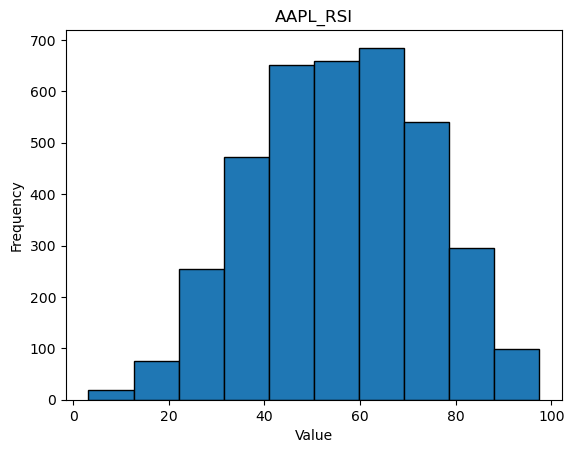

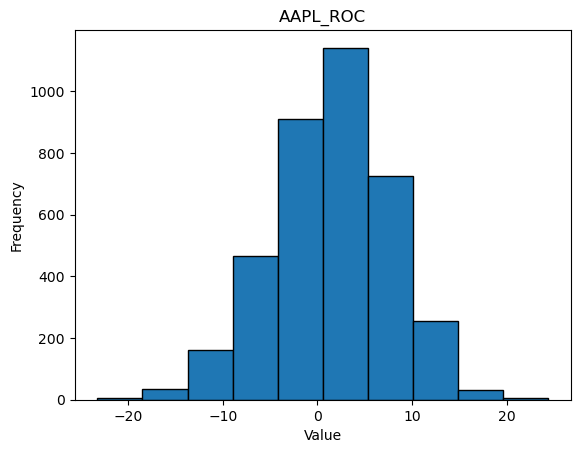

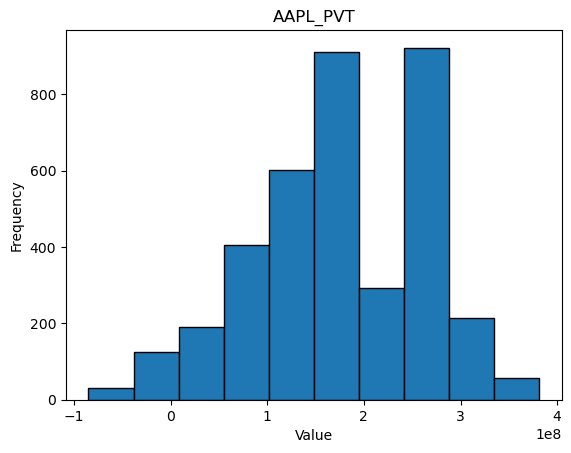

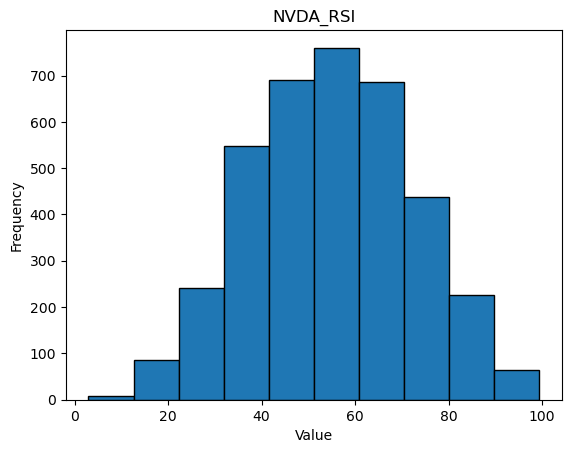

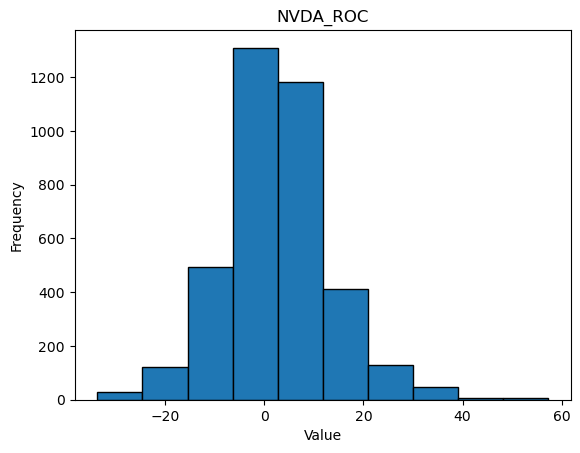

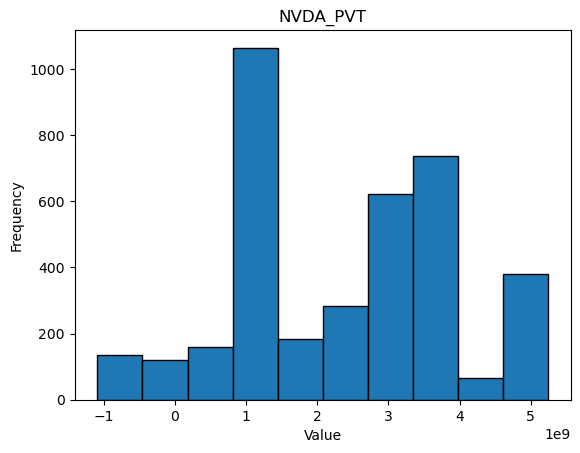

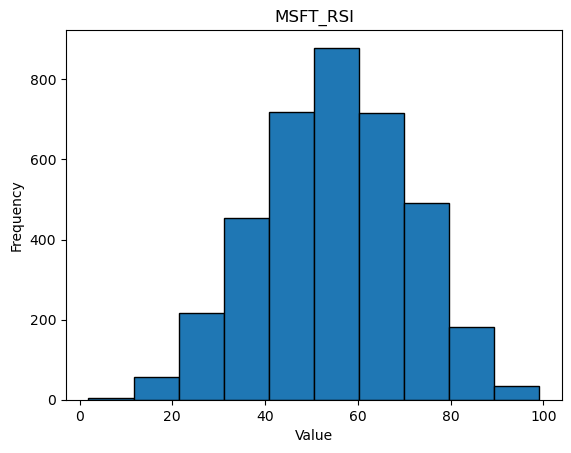

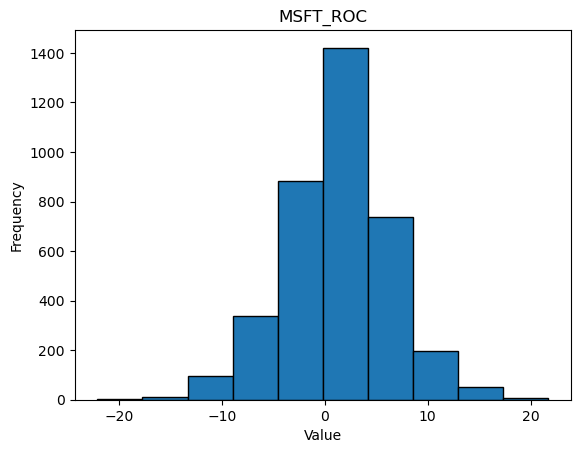

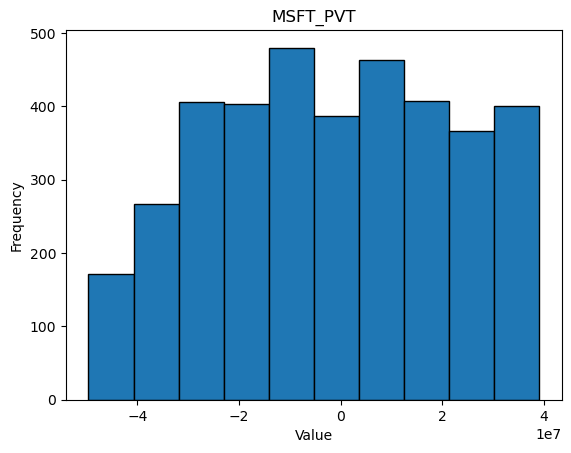

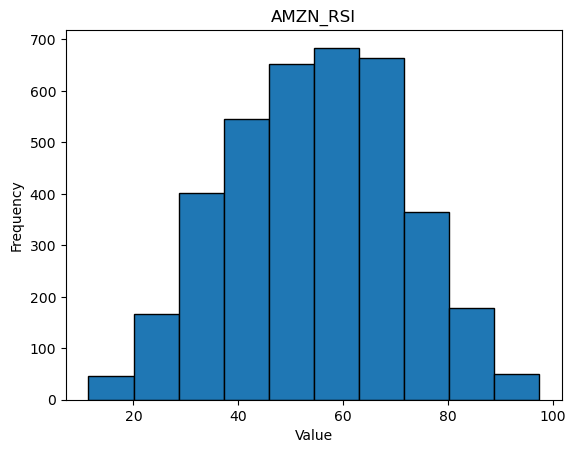

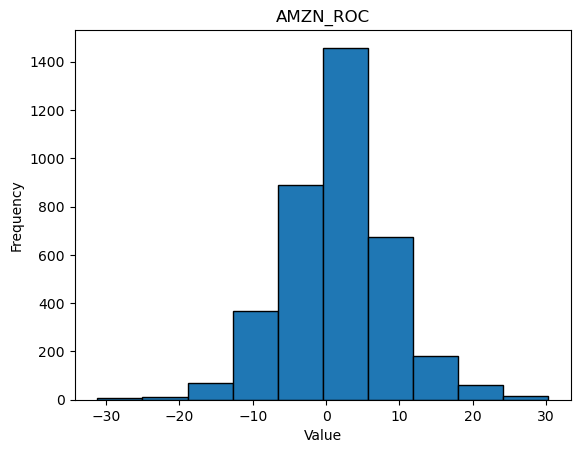

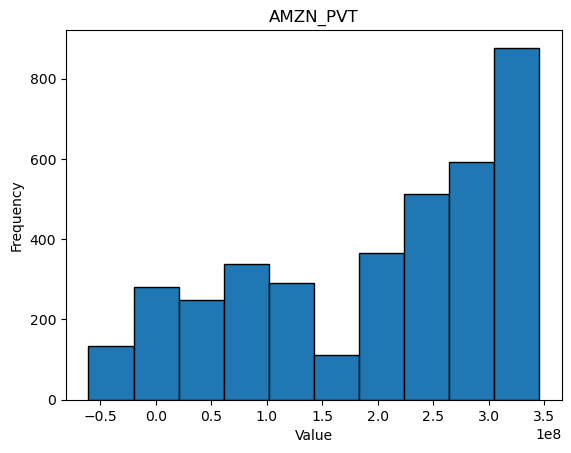

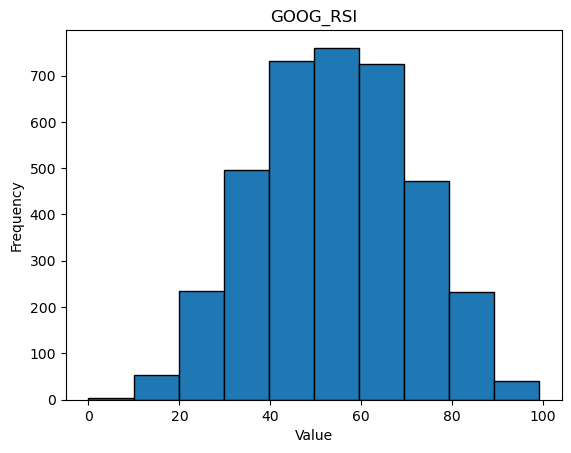

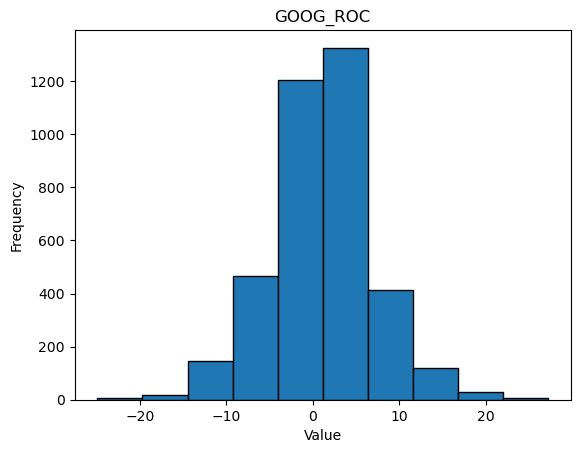

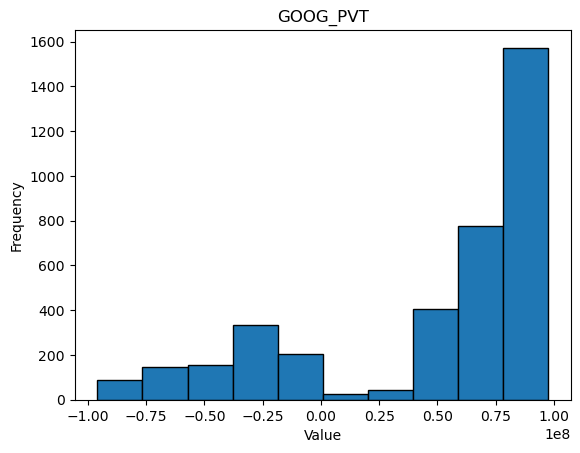

In [34]:
for i in stocks:
    for j in ["RSI", "ROC", "PVT"]:
        hist = data_spark[i].select(j).rdd.flatMap(lambda x: x).histogram(10)
        plt.figure()
        plt.title(i+"_"+j)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.hist(hist[0][:-1], bins = hist[0], weights = hist[1], edgecolor = "black")
        plt.show()

#### 3.1.2. Handling missing values

---

We notice on our graphs that for each stock, the variables "RSI" and "ROC" present a symmetrical distribution while the variable "PVT" has an asymmetrical distribution. 
We use the previously implemented function, `descriptive_stat()`, on the "RSI" and "ROC" columns of each stock in order to obtain the average of the latter.
We can thus replace the missing values ​​of these columns with their average. We will then calculate the median and replace the missing values ​​in the "PVT" column with the latter.

In [42]:
# We call our function to extract key statistics from our Spark DataFrame
for i in data_spark:
    print(i)
    descriptive_stat(data_spark[i].select("RSI", "ROC"))

AAPL
+-------+------------------+-------------------+
|summary|               RSI|                ROC|
+-------+------------------+-------------------+
|  count|              3751|               3739|
|   mean|55.813103988563306| 1.5501675137327864|
| stddev| 17.84396586519344| 6.2779825068363815|
|    min|3.1798355757619277|-23.282369221135987|
|    max| 97.48775421016985| 24.404679930578645|
+-------+------------------+-------------------+

NVDA
+-------+------------------+-------------------+
|summary|               RSI|                ROC|
+-------+------------------+-------------------+
|  count|              3750|               3739|
|   mean|54.989161520057365| 2.7692602832192725|
| stddev| 17.15221219170883|  10.73006651216249|
|    min|  2.97864831870929|-33.652755458719525|
|    max| 99.42870951369811|  57.26672997909203|
+-------+------------------+-------------------+

MSFT
+-------+------------------+------------------+
|summary|               RSI|               ROC|
+----

In [35]:
# We replace the missing values ​​in the "RSI" and "ROC" columns with their means
data_spark["AAPL"] = data_spark["AAPL"].fillna({"RSI": 55.813103988563306, "ROC": 1.5501675137327864})
data_spark["NVDA"] = data_spark["NVDA"].fillna({"RSI": 54.989161520057365, "ROC": 2.7692602832192725})
data_spark["MSFT"] = data_spark["MSFT"].fillna({"RSI": 55.08913855166739, "ROC": 1.2225491430354725})
data_spark["AMZN"] = data_spark["AMZN"].fillna({"RSI": 54.746830238989666, "ROC": 1.563319359741583})
data_spark["GOOG"] = data_spark["GOOG"].fillna({"RSI": 54.17704534211563, "ROC": 1.106343330127082})

# We replace missing values ​​in the "PVT" column with the median (50th percentile) for each stock 
for i in stocks:
    data_spark[i] = data_spark[i].fillna({"PVT": data_spark[i].approxQuantile("PVT", [0.5], 0.01)[0]})


We recheck if there are any missing values ​​remaining using our `missing_values()` function.

In [36]:
# We check if there are missing values ​​in our columns
for i in data_spark:
    print(i)
    missing_values(data_spark[i])

AAPL
+----+-----+----+---+----+------+-----+----+----+-----------------+---+---+----+------+----+---+---+---+---+
|Date|Close|High|Low|Open|Volume|Month|Year|Week|Daily_Return_Rate|RSI|PPO|MACD|Signal|VWAP|OBV|CMF|PVT|ROC|
+----+-----+----+---+----+------+-----+----+----+-----------------+---+---+----+------+----+---+---+---+---+
|   0|    0|   0|  0|   0|     0|    0|   0|   0|                0|  0|  0|   0|     0|   0|  0|  0|  0|  0|
+----+-----+----+---+----+------+-----+----+----+-----------------+---+---+----+------+----+---+---+---+---+

NVDA
+----+-----+----+---+----+------+-----+----+----+-----------------+---+---+----+------+----+---+---+---+---+
|Date|Close|High|Low|Open|Volume|Month|Year|Week|Daily_Return_Rate|RSI|PPO|MACD|Signal|VWAP|OBV|CMF|PVT|ROC|
+----+-----+----+---+----+------+-----+----+----+-----------------+---+---+----+------+----+---+---+---+---+
|   0|    0|   0|  0|   0|     0|    0|   0|   0|                0|  0|  0|   0|     0|   0|  0|  0|  0|  0|
+----+--

### 3.2. Convert to Pandas Dataframe
 <p style="text-align: left; color: #555; font-size: 16px;">
    To make data visualization easier, we will convert our Spark dataframes to Pandas dataframes. Additionally, we will be able to load our data into a second notebook where we will perform part 4 (data visualization).
</p>


In [48]:
# Name of the folder where we will save our dataframe as a csv file
folder_path = "data_cleaned"

# We create the folder to save our dataframe if it does not already exist
os.makedirs(folder_path, exist_ok = True)

# We save our data frames in csv format so that we can use them in the second notebook which will process the following parts
df_AAPL = data_spark["AAPL"].toPandas().to_csv("./data_cleaned/AAPL_cleaned.csv", index = False)
df_NVDA = data_spark["NVDA"].toPandas().to_csv("./data_cleaned/NVDA_cleaned.csv", index = False) 
df_MSFT = data_spark["MSFT"].toPandas().to_csv("./data_cleaned/MSFT_cleaned.csv", index = False) 
df_AMZN = data_spark["AMZN"].toPandas().to_csv("./data_cleaned/AMZN_cleaned.csv", index = False) 
df_GOOG = data_spark["GOOG"].toPandas().to_csv("./data_cleaned/GOOG_cleaned.csv", index = False) 